# Using ICsound

*csoundmagics* includes an *ICsound* class which is adapted from André Cabrera's [icsound](https://github.com/csound/csound/wiki/icsound) module. *ICsound* is bound to the *%%csound* and *%csound* magics command.

This notebook is an adaptation of André's [icsound test notebook](https://github.com/csound/csound/blob/develop/frontends/icsound/icsound%20test%20notebook.ipynb).

## Starting the Csound engine

To use *ICsound* create an *ICsound* instance:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%load_ext csoundmagics

Creating an *ICsound* object automatically starts the engine:

In [3]:
cs = ICsound(port=12894)

Csound engine started at slot#: 1.
Listening to port 12894


You can set the properties of the Csound engine with parameters to the startEngine() function.

In [4]:
help(cs.startEngine)

Help on method startEngine in module csoundmagics:

startEngine(sr=48000, ksmps=100, nchnls=2, zerodbfs=1.0, dac='dac', adc='', port=0, bufferSize=0) method of csoundmagics.ICsound instance
    Start an ICsound engine.
    
    The user can specify values for sr, ksmps, nchnls, zerodbfs, dac, adc,
    a port number, and the messages buffer size. If a port number is given,
    this engine will listen to that port for csound code and events.



The engine runs in a separate thread, so it doesn't block execution of python.

In [5]:
cs.startEngine()

CsoundMagics: Csound already running


Use the *%%csound* magic command to directly type csound language code in the cell and send it to the engine. The number after the magic command is optional; it references the slot where the engine is running. If omitted, slot#1 is assumed.

In [6]:
%%csound 1
gkinstr init 1

In [7]:
%%csound
print i(gkinstr)

So where did it print?

In [8]:
cs.printLog()

Reading options from $HOME/.csound6rc
rtaudio: ALSA module enabled
rtmidi: ALSA Raw MIDI module enabled
UDP server started on port 12894
displays suppressed
0dBFS level = 1.0
orch now loaded
audio buffered in 1024 sample-frame blocks
ALSA: -b 512 not allowed on this device; using 341 instead
writing 2048 sample blks of 64-bit floats to dac
SECTION 1:
instr 0:  #i0 = 1.000



By default, messages from Csound are not shown, but they are stored in an internal buffer. You can view them with the printLog() function. If the log is getting too long and confusing, use the clearLog() function.

## Function tables

You can create csound f-tables directly from python lists or numpy arrays:

In [9]:
cs.fillTable(1, np.array([8, 7, 9, 1, 1, 1]))
cs.fillTable(2, [4, 5, 7, 0, 8, 7, 9, 6])

Tables can be plotted in the usual matplotlib way, but *ICsound* provides a plotTable function which styles the graphs.

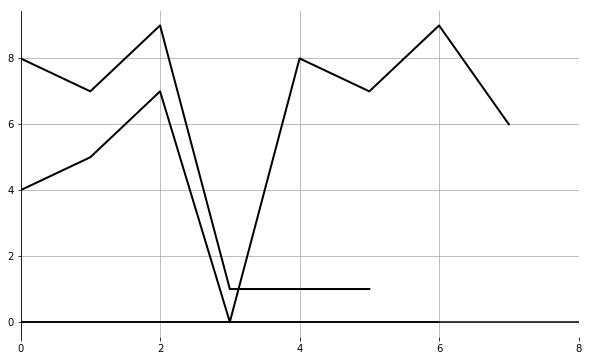

In [10]:
cs.plotTable(1)
cs.plotTable(2, reuse=True)
plt.grid()

You can get the function table values from the csound instance:

In [11]:
cs.table(2)

array([4., 5., 7., 0., 8., 7., 9., 6.])

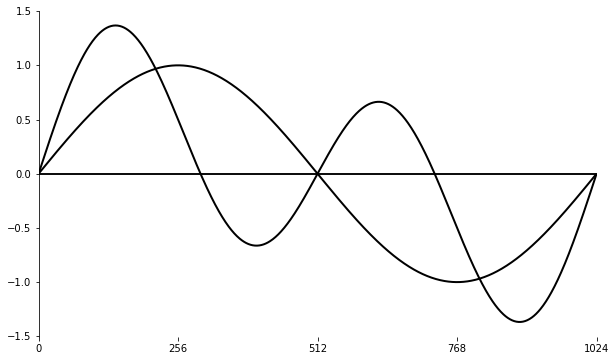

In [12]:
cs.makeTable(2, 1024, 10, 1)
cs.makeTable(3, 1024, -10, 0.5, 1)
cs.plotTable(2)
cs.plotTable(3, reuse=True)
#ylim((-1.1,1.1))

In [13]:
cs.table(2)[100: 105]

array([0.57580819, 0.58081396, 0.58579786, 0.5907597 , 0.5956993 ])

The following will create 320 tables with 720 points each:

In [14]:
randsig = np.random.random((320, 720))
i = 0
for i, row in enumerate(randsig):
    cs.fillTable(50 + i, row)
    print(i, '..', end=' ')

0 .. 1 .. 2 .. 3 .. 4 .. 5 .. 6 .. 7 .. 8 .. 9 .. 10 .. 11 .. 12 .. 13 .. 14 .. 15 .. 16 .. 17 .. 18 .. 19 .. 20 .. 21 .. 22 .. 23 .. 24 .. 25 .. 26 .. 27 .. 28 .. 29 .. 30 .. 31 .. 32 .. 33 .. 34 .. 35 .. 36 .. 37 .. 38 .. 39 .. 40 .. 41 .. 42 .. 43 .. 44 .. 45 .. 46 .. 47 .. 48 .. 49 .. 50 .. 51 .. 52 .. 53 .. 54 .. 55 .. 56 .. 57 .. 58 .. 59 .. 60 .. 61 .. 62 .. 63 .. 64 .. 65 .. 66 .. 67 .. 68 .. 69 .. 70 .. 71 .. 72 .. 73 .. 74 .. 75 .. 76 .. 77 .. 78 .. 79 .. 80 .. 81 .. 82 .. 83 .. 84 .. 85 .. 86 .. 87 .. 88 .. 89 .. 90 .. 91 .. 92 .. 93 .. 94 .. 95 .. 96 .. 97 .. 98 .. 99 .. 100 .. 101 .. 102 .. 103 .. 104 .. 105 .. 106 .. 107 .. 108 .. 109 .. 110 .. 111 .. 112 .. 113 .. 114 .. 115 .. 116 .. 117 .. 118 .. 119 .. 120 .. 121 .. 122 .. 123 .. 124 .. 125 .. 126 .. 127 .. 128 .. 129 .. 130 .. 131 .. 132 .. 133 .. 134 .. 135 .. 136 .. 137 .. 138 .. 139 .. 140 .. 141 .. 142 .. 143 .. 144 .. 145 .. 146 .. 147 .. 148 .. 149 .. 150 .. 151 .. 152 .. 153 .. 154 .. 155 .. 156 .. 157 .. 158 

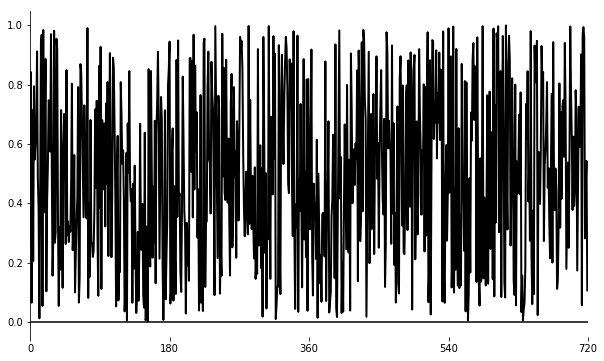

In [15]:
cs.plotTable(104)

## Sending instruments

You can send instruments to a running csound engine with the *%%csound* magic. Any syntax errors will be displayed inline.

In [16]:
%%csound 1
instr 1
asig asds


error: syntax error, unexpected T_IDENT  (token "asds") line 2:
>>>asig asds <<<
Unexpected untyped word asig when expecting a variable
Parsing failed due to invalid input!
Stopping on parser failure



In [17]:
%%csound 1
instr 1
asig oscil 0.5, 440
outs asig, asig


error: syntax error, unexpected $end  (token "") line 3:
>>>outs asig, asig <<<
Parsing failed due to invalid input!
Stopping on parser failure



In [18]:
%%csound 1
instr 1
asig oscil 0.5, 440
outs asig, asig
endin

## Channels

Csound channels can be used to send values to Csound. They can affect running instances of instruments by using the *invalue/chnget* opcodes:

In [19]:
cs.setChannel("val", 20)

You can also read the channels from Csound. These channels can be set from *ICsound* or within instruments with the *outvalue/chnset* opcodes:

In [20]:
cs.channel("val")

(20.0, c_int(0))

## Recording the output

You can record the realtime output from csound:

In [21]:
cs.startRecord("out.wav")

In [22]:
cs.sendScore("i 1 0 1")
import time
time.sleep(1)

In [23]:
cs.stopRecord()

In [24]:
!aplay out.wav

Lecture WAVE 'out.wav' : Signed 16 bit Little Endian, Fréquence 48000 Hz, Stéréo


## Remote engines

You can also interact with engines through UDP. Note that not all operations are available, notably reading f-tables, but you can send instruments and note events to the remote engine.

In [25]:
cs_client = ICsound()
cs_client.startClient()

Csound engine started at slot#: 2.


In [26]:
cs.clearLog()

Now send notes and instruments from the client:

In [27]:
cs_client.sendScore("i 1 0 1")
cs_client.sendCode("print i(gkinstr)")

And show the log in the server:

In [28]:
cs.printLog()

instr 0:  #i0 = 1.000



## Stopping the engine

In [29]:
cs.stopEngine()

In [30]:
cs

If we don't need *cs_client* anymore, we can delete its slot with the *%csound* line magic (note the single % sign and the negative slot#). The python instance *cs_client* can then be deleted:

In [31]:
%csound -2
del cs_client

Erasing slot#: 2


## Audification

Reading Earthquake data through a web API (might take a few minutes):

In [33]:
prefix = 'http://service.iris.edu/irisws/timeseries/1/query?'
SCNL_parameters = 'net=IU&sta=ANMO&loc=00&cha=BHZ&'
times = 'starttime=2005-01-01T00:00:00&endtime=2005-01-02T00:00:00&'
output = 'output=ascii'
import urllib
f = urllib.request.urlopen(prefix + SCNL_parameters + times + output)
timeseries = f.read()

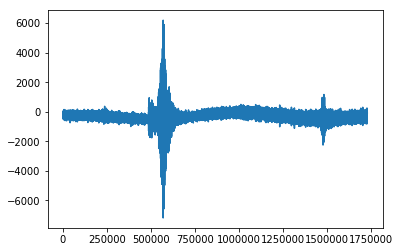

In [34]:
import ctcsound
data = ctcsound.pstring(timeseries).split('\n')
dates = []
values = []

for line in data[1:-1]:
    date, val = line.split()
    dates.append(date)
    values.append(float(val))

plt.plot(values)

In [35]:
cs.startEngine()
cs.fillTable(1, values)

Csound engine started at slot#: 1.


Instrument to play back the earthquake data stored in a table:

In [36]:
%%csound 1
instr 1
idur = p3
itable = p4
asig poscil 1/8000, 1/p3, p4
outs asig, asig
endin

Listen:

In [37]:
cs.sendScore('i 1 0 3 1')

Slower:

In [38]:
cs.sendScore('i 1 0 7 1')

Quicker:

In [39]:
cs.sendScore('i 1 0 1 1')

## Other tests

Another engine:

In [40]:
ics = ICsound(bufferSize=64)

Csound engine started at slot#: 2.


In [41]:
ics.listInterfaces()

 1: {'device_name': 'VT1802 Ana', 'device_id': 'dac:hw:0,0', 'rt_module': '', 'max_nchnls': -1, 'isOutput': True}
 2: {'device_name': 'VT1802 Alt', 'device_id': 'dac:hw:0,2', 'rt_module': '', 'max_nchnls': -1, 'isOutput': True}
 3: {'device_name': 'HDMI 0 : H', 'device_id': 'dac:hw:0,3', 'rt_module': '', 'max_nchnls': -1, 'isOutput': True}
 4: {'device_name': 'HDMI 0 : H', 'device_id': 'dac:hw:1,3', 'rt_module': '', 'max_nchnls': -1, 'isOutput': True}
 5: {'device_name': 'HDMI 0 : H', 'device_id': 'dac:hw:1,7', 'rt_module': '', 'max_nchnls': -1, 'isOutput': True}
 6: {'device_name': 'HDMI 0 : H', 'device_id': 'dac:hw:1,8', 'rt_module': '', 'max_nchnls': -1, 'isOutput': True}
 7: {'device_name': 'HDMI 0 : H', 'device_id': 'dac:hw:1,9', 'rt_module': '', 'max_nchnls': -1, 'isOutput': True}


In [42]:
%%csound 2

instr 1
asig oscil 0.5, 440
outs asig, asig
endin

In [43]:
ics.sendScore("i 1 0 0.5")

In [44]:
%csound -2

Erasing slot#: 2


In [45]:
del ics

In [46]:
cs.stopEngine()